# Week 2 assignment: Exploratory data analysis

In [1]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

df_steps = pd.read_csv('steps.csv', sep=";")
df_steps.head()

df_survey = pd.read_csv('survey.csv')
df_survey.head()

#importing data sets

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [2]:
df = df_survey.merge(df_steps, on="id")
df.head()

#Merge datasets

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Create the variable mean steps per participant. 
#I need to take out the steps
steps = df.loc[:,'20-6-2013' : '13-5-2014']

#calculating the mean steps of the participants
steps["mean"] = steps.mean(axis=1, skipna=True)

df['mean'] = steps['mean']
df.head()


,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


## The relation of meansteps per participant 

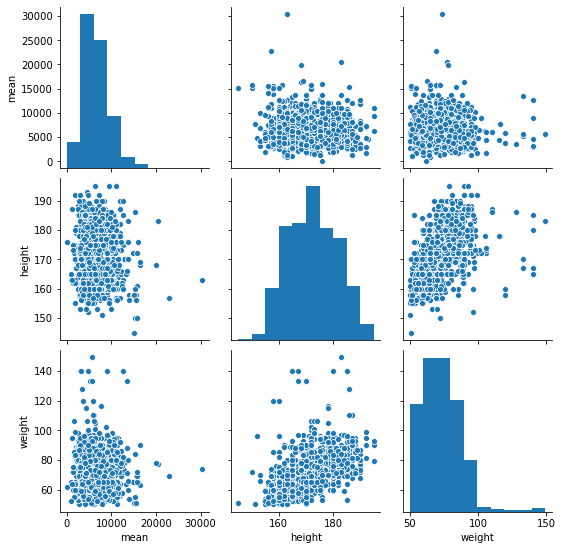

In [14]:
#correlation matrix including all three variables

df_sel = df[['mean', 'height', 'weight']]
sns.pairplot(df_sel)
plt.show()

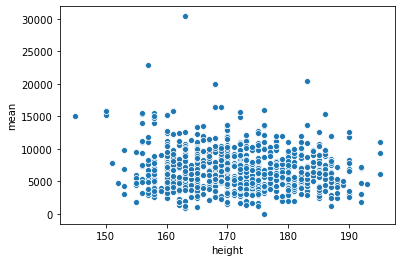

In [15]:
#now its time to remove the outliers

def above_40000(x):
    if(x>40000):
        return float("NaN")
    else:
        return x

df["mean"] = df["mean"].apply(above_40000)
sns.scatterplot(data=df, x="height", y="mean")

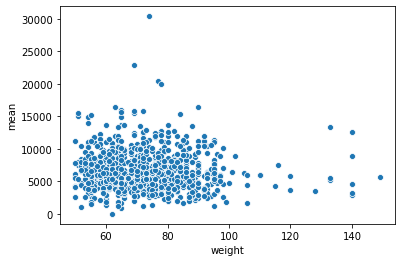

In [16]:
#now its time to remove the outliers on the side of the weight. Above 150 kilos

def above_150(x):
    if(x> 150):
        return float("NaN")
    else:
        return x
    
def below_50(x):
    if(x<50):
        return float ("NaN")
    else:
        return x
    

#Plot th is in a scatterplot

df["weight"] = df["weight"].apply(above_150)
df["weight"] = df["weight"].apply(below_50)
sns.scatterplot(data=df, x="weight", y="mean")


In [17]:
pearson_corr = df[["mean", "height", "weight"]].corr(method='pearson')
pearson_corr

,mean,height,weight
mean,1.000000,-0.091415,-0.057655
height,-0.091415,1.000000,0.489445
weight,-0.057655,0.489445,1.000000


## The relation of mean steps per participant

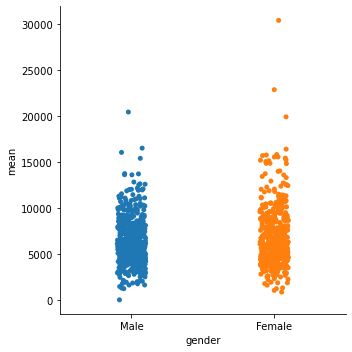

In [18]:
#show the relation of mean steps per participant and gender

df["mean"] = df ["mean"].apply(above_40000)
tips = sns.load_dataset("tips")
sns.catplot(x="gender", y="mean", data=df)

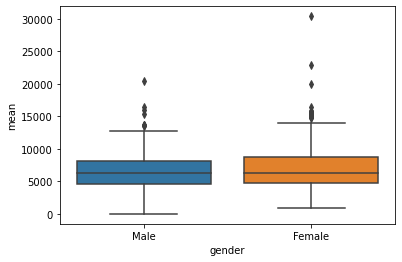

In [19]:
#show it in a boxplot 

df["mean"] = df["mean"].apply(above_40000)
ax = sns.boxplot(x="gender", y="mean", data=df)

If you have a look at the catplot, you can see that the female side had more outliers. In the boxplot you see the female side is more spread. That means females do more steps.

## The relation between two qualitative variables 

In [20]:
#calculate percentage of participants per age group per education

ct = pd.crosstab(df["age"], df["education"]).apply(lambda r: r/r.sum()*100, axis=1)
ct

education,1,2,3,4,5
age,,,,,
25-34,26.995305,46.713615,1.643192,20.657277,3.990610
35-44,18.539326,21.348315,5.617978,52.247191,2.247191
45-54,25.170068,21.768707,3.401361,48.979592,0.680272
55-64,30.434783,41.304348,0.000000,28.260870,0.000000
65+,0.000000,42.857143,0.000000,57.142857,0.000000
<25,28.000000,33.600000,11.200000,13.600000,13.600000


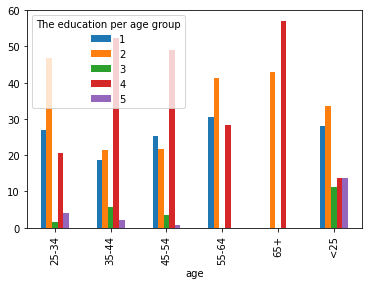

In [21]:
#Now i plot the crostab in a bar graph

ct.plot.bar(stacked=False)
plt.legend(title="The education per age group")
plt.show()

When you look at the graph you see most of the people are in the first of the second education section. The older people from 55-65+ are not on the 5 educational level.